In [138]:
import re
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import scipy.signal as signal
from scipy.io import savemat
import zipfile
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
def parse_data_to_columns(file_path):
    pattern = re.compile(r'data\s*=\s*\[([^\]]+)\]')
    data_lists = []

    with open(file_path, 'r', encoding = 'cp1251') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                data_str = match.group(1)
                try:
                    numbers = [float(x.strip()) for x in data_str.split(',') if x.strip()]
                    data_lists.append(numbers)
                except ValueError:
                    continue

    if not data_lists:
        return pd.DataFrame()

    first_col_length = len(data_lists[0])

    columns = {}
    for idx, data in enumerate(data_lists, start=1):
        col_name = f"column {idx}"
        if len(data) < first_col_length:
            padded_data = data + [float('nan')] * (first_col_length - len(data))
        else:
            padded_data = data[:first_col_length]
        columns[col_name] = padded_data

    return pd.DataFrame(columns)

In [140]:
folder_path = '/content/drive/MyDrive/dataset/PD'
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.txt')]
file_paths.sort()

df_list = []

for i, path in enumerate(file_paths):
    try:
        df_file = parse_data_to_columns(path)

        if df_file is not None:
            df_list.append(df_file)
        else:
            print(f"Не удалось обработать файл {i+1}")

    except Exception as e:
        print(f"Ошибка при обработке файла {path}: {str(e)}")

In [141]:
column_names = [
        'EOG_left_h',
        'EOG_right_h',
        'EOG_left_v',
        'EOG_right_v',
        'head_horizontal',
        'head_frontal',
        'head_sagittal',
        'Сигнал_8',
        'Сигнал_9',
        'Сигнал_10',
        'Сигнал_11'
    ]

for df in df_list:
    df.columns = column_names

for df in df_list:
    #df.drop(df.columns[[7, 8, 9, 10]], axis=1, inplace=True)
    df.insert(0, 'time', range(len(df)))

In [142]:
folder_path = '/content/drive/MyDrive/dataset/PD'
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.txt')]
file_paths.sort()

df_list_raw_PD = []

for i, path in enumerate(file_paths):
    try:
        df_file = parse_data_to_columns(path)

        if df_file is not None:
            df_list_raw_PD.append(df_file)
        else:
            print(f"Не удалось обработать файл {i+1}")

    except Exception as e:
        print(f"Ошибка при обработке файла {path}: {str(e)}")

In [143]:
column_names = [
        'EOG_left_h',
        'EOG_right_h',
        'EOG_left_v',
        'EOG_right_v',
        'head_horizontal',
        'head_frontal',
        'head_sagittal',
        'Сигнал_8',
        'Сигнал_9',
        'Сигнал_10',
        'Сигнал_11'
    ]

for df in df_list_raw_PD:
    df.columns = column_names

for df in df_list_raw_PD:
    #df.drop(df.columns[[1,3,4,5,6,7, 8, 9, 10]], axis=1, inplace=True)
    df.insert(0, 'time', range(len(df)))

In [144]:
folder_path = '/content/drive/MyDrive/dataset/ET'
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.txt')]
file_paths.sort()

df_list_raw_ET = []

for i, path in enumerate(file_paths):
    try:
        df_file = parse_data_to_columns(path)

        if df_file is not None:
            df_list_raw_ET.append(df_file)
        else:
            print(f"Не удалось обработать файл {i+1}")

    except Exception as e:
        print(f"Ошибка при обработке файла {path}: {str(e)}")

In [145]:
column_names = [
        'EOG_left_h',
        'EOG_right_h',
        'EOG_left_v',
        'EOG_right_v',
        'head_horizontal',
        'head_frontal',
        'head_sagittal',
        'Сигнал_8',
        'Сигнал_9',
        'Сигнал_10',
        'Сигнал_11'
    ]

for df in df_list_raw_ET:
    df.columns = column_names

for df in df_list_raw_ET:
    #df.drop(df.columns[[1,3,4,5,6,7, 8, 9, 10]], axis=1, inplace=True)
    df.insert(0, 'time', range(len(df)))

In [146]:
import pandas as pd
def combine_eog_columns(df_list, prefix):
    combined_df = pd.DataFrame()

    for i, df in enumerate(df_list):
        if 'EOG_left_v' in df.columns:
            col_name = f'{prefix}_{i}'
            combined_df[col_name] = df['EOG_right_v'] ########################## Смена канала
        else:
            print(f"Предупреждение: в таблице {i} нет колонки 'EOG_left_v'")

    return combined_df

combined_et = combine_eog_columns(df_list_raw_ET, 'ET')
combined_pd = combine_eog_columns(df_list_raw_PD, 'PD')

combined_et.to_csv('EOG_ET_combined.csv', index=False)
combined_pd.to_csv('EOG_PD_combined.csv', index=False)

print("Файлы успешно сохранены:")
print(f"- EOG_ET_combined.csv: {combined_et.shape[1]} колонок")
print(f"- EOG_PD_combined.csv: {combined_pd.shape[1]} колонок")

Файлы успешно сохранены:
- EOG_ET_combined.csv: 10 колонок
- EOG_PD_combined.csv: 17 колонок


In [147]:
import plotly.graph_objects as go

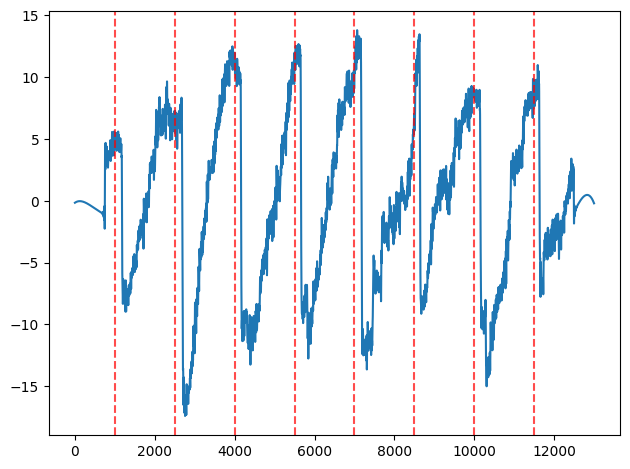

In [148]:
df = df_list[10]['EOG_left_v']
x_coords = [1000, 2500, 4000, 5500, 7000, 8500, 10000, 11500]

plt.plot(df)

for x in x_coords:
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [149]:
df_list[14]['EOG_left_h']

,EOG_left_h
0,3.908329
1,3.908329
2,3.908329
3,3.908329
4,3.908329
...,...
12995,-6.712188
12996,-6.712188
12997,-6.712188
12998,-6.712188


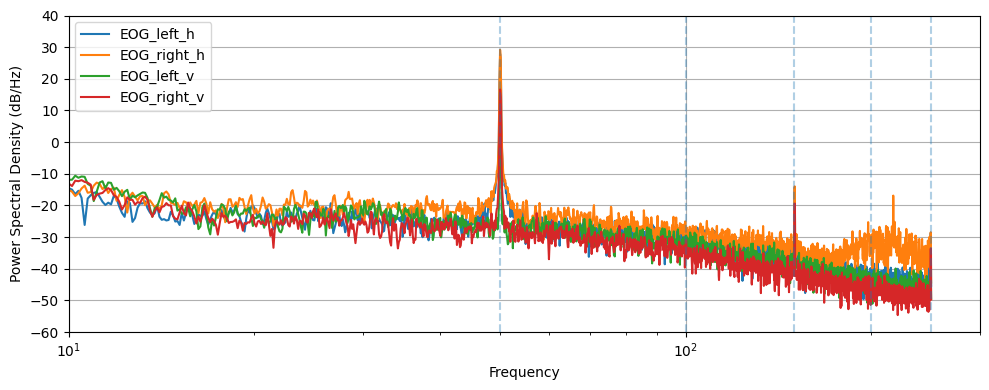

In [150]:
fs = 500

df = df_list[14]
chs = ["EOG_left_h", "EOG_right_h", "EOG_left_v", "EOG_right_v"]

plt.figure(figsize=(10,4))

for ch in chs:
    x = df[ch].to_numpy()
    x = x[np.isfinite(x)]
    x = x - x.mean()
    plt.psd(x, Fs=fs, NFFT=4096, noverlap=2048, label=ch)

plt.xscale("log")
plt.xlim(10, 300)
for lf in [50, 100, 150, 200, 250]:
    plt.axvline(lf, ls="--", alpha=0.35)

plt.legend()
plt.tight_layout()
plt.show()


In [151]:
import numpy as np
from scipy.signal import iirnotch, filtfilt
from google.colab import files

fs = 500
freqs = [50, 150]
Q = 35
chs = ["EOG_left_h", "EOG_right_h", "EOG_left_v", "EOG_right_v"]

df = df_list[14]
df_f = df.copy()

for ch in chs:
    s = df[ch].astype(float).interpolate(limit_direction="both").to_numpy()
    for f0 in freqs:
        if f0 < fs/2:
            b, a = iirnotch(f0, Q, fs=fs)
            s = filtfilt(b, a, s)
    df_f[ch] = s

out_path = "/content/df_list14_filtered.csv"
df_f.to_csv(out_path, index=False)
files.download(out_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

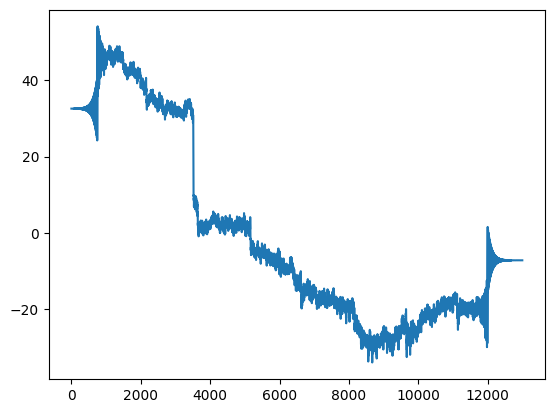

In [152]:
plt.plot(df_f["EOG_right_h"])

In [153]:
import os, shutil
from google.colab import files

cols = [
    'EOG_left_h',
    'EOG_right_h',
    'EOG_left_v',
    'EOG_right_v',
    'head_horizontal',
    'head_frontal',
    'head_sagittal',
]

root = "/content/PD_ET_csv"
out_pd = os.path.join(root, "PD")
out_et = os.path.join(root, "ET")
os.makedirs(out_pd, exist_ok=True)
os.makedirs(out_et, exist_ok=True)

def _name(i, paths_var=None, prefix="sample"):
    if paths_var is not None:
        base = os.path.splitext(os.path.basename(paths_var[i]))[0]
        return base
    return f"{prefix}_{i:05d}"

# если у тебя есть списки путей pd_txt / et_txt — имена возьмём из них, иначе просто по индексу
pd_paths = globals().get("pd_txt", None)
et_paths = globals().get("et_txt", None)

for i, df in enumerate(df_list_raw_PD):
    miss = [c for c in cols if c not in df.columns]
    if miss: raise ValueError(f"PD[{i}] missing columns: {miss}")
    df.loc[:, cols].to_csv(os.path.join(out_pd, _name(i, pd_paths, "PD") + ".csv"), index=False)

for i, df in enumerate(df_list_raw_ET):
    miss = [c for c in cols if c not in df.columns]
    if miss: raise ValueError(f"ET[{i}] missing columns: {miss}")
    df.loc[:, cols].to_csv(os.path.join(out_et, _name(i, et_paths, "ET") + ".csv"), index=False)

zip_path = shutil.make_archive(root, "zip", root)
files.download(zip_path)


KeyboardInterrupt: 